# 4 EDA

5/4/22



- [setup](#setup)
    - [Import libraries](#Import-libraries)
    - [import data](#import-data)
- [By Column]
    - []()
    - []()

## setup

### Import libraries

In [675]:
import pandas as pd
import numpy as np
import os
import json
import ast
#use this to find union of multiple lists
from functools import reduce

#plotting
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns

#pandas options
pd.options.display.max_columns = 100

plt.style.use('dark_background')

merged_data_path = '../merged_data/'


### import data

In [676]:
os.listdir(merged_data_path)

['merged_tweets.csv',
 'merged_users.csv',
 'wordle_games.csv',
 'wordle_games.pkl']

In [677]:
#low_memory = False is to deal with mixed column types. check these
tweets = pd.read_csv(merged_data_path + 'merged_tweets.csv', low_memory = False)
users = pd.read_csv(merged_data_path + 'merged_users.csv', low_memory = False)

In [678]:
tweets.set_index('id', inplace = True)
tweets.head(3)

,conversation_id,reply_settings,lang,entities,possibly_sensitive,source,public_metrics,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld
id,,,,,,,,,,,,,,,,
1521733018293084160,1521733018293084160,everyone,en,"{'urls': [{'start': 54, 'end': 77, 'url': 'htt...",False,Twitter Web App,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle (ES) #118 5/6\n\n⬜⬜🟨🟩⬜\n⬜⬜🟨🟩⬜\n⬜⬜⬜🟩🟩\n...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1006110502043471872,2022-05-04 06:06:38+00:00,NaN,NaN,NaN,NaN,NaN
1521733015738662913,1521733015738662913,everyone,es,"{'urls': [{'start': 58, 'end': 81, 'url': 'htt...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle Científico #52 5/6\n\n⬜⬜⬜⬜🟨\n🟨⬜⬜⬜🟩\n⬜🟩⬜...,"[{'domain': {'id': '30', 'name': 'Entities [En...",360002014,2022-05-04 06:06:38+00:00,NaN,NaN,NaN,NaN,NaN
1521733011414257664,1521733011414257664,everyone,en,NaN,False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 319 4/6\n\n🟨🟨⬜⬜⬜\n🟨⬜⬜🟩⬜\n🟩🟨⬜🟩🟨\n🟩🟩🟩🟩🟩,"[{'domain': {'id': '30', 'name': 'Entities [En...",828818052892422148,2022-05-04 06:06:37+00:00,NaN,NaN,NaN,NaN,NaN


In [679]:
users.set_index('id', inplace = True)
#when it comes to drop_duplicates, any NaNs are not considered duplicate values.
# any repeated rows with NaNs must be dealt with.
users.drop_duplicates(inplace=True)
users.head(3)

,name,public_metrics,url,description,profile_image_url,location,protected,username,verified,entities,pinned_tweet_id,withheld
id,,,,,,,,,,,,
1.006111e+18,Jose Antonio,"{'followers_count': 147, 'following_count': 43...",NaN,"Antiguo usuario bloqueado por error, pero he v...",https://pbs.twimg.com/profile_images/144681186...,"Alcalá de Guadaíra, Spain",False,Joseamj_97,False,NaN,NaN,NaN
3.600020e+08,Ana V Garcia,"{'followers_count': 41, 'following_count': 136...",https://t.co/uMfikCmd0I,NaN,https://pbs.twimg.com/profile_images/122215871...,Alcalá de Henares,False,AnaVGarciaG,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",NaN,NaN
8.288181e+17,Braden Van't Hof,"{'followers_count': 8, 'following_count': 282,...",NaN,LoL Head Coach/Manager/Mid Laner/4x Positional...,https://pbs.twimg.com/profile_images/149527273...,"Grand Rapids, MI",False,CLVRockmelon,False,NaN,NaN,NaN


In [680]:
#I want to left-merge onto tweets. Each tweet has user info tacked on. some users will be repeated.
len(tweets), len(users)

(243245, 145718)

### tweets and users NaNs

In [681]:
#pick out tweets columns with any null values
tweets.loc[:, tweets.isna().any()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243245 entries, 1521733018293084160 to 1520733408237916161
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   entities             75656 non-null   object 
 1   context_annotations  240247 non-null  object 
 2   referenced_tweets    24174 non-null   object 
 3   in_reply_to_user_id  22580 non-null   float64
 4   attachments          2720 non-null    object 
 5   geo                  3717 non-null    object 
 6   withheld             3 non-null       object 
dtypes: float64(1), object(6)
memory usage: 14.8+ MB


In [682]:
tweets.loc[:, tweets.isna().any()].head(4)

,entities,context_annotations,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld
id,,,,,,,
1521733018293084160,"{'urls': [{'start': 54, 'end': 77, 'url': 'htt...","[{'domain': {'id': '30', 'name': 'Entities [En...",NaN,NaN,NaN,NaN,NaN
1521733015738662913,"{'urls': [{'start': 58, 'end': 81, 'url': 'htt...","[{'domain': {'id': '30', 'name': 'Entities [En...",NaN,NaN,NaN,NaN,NaN
1521733011414257664,NaN,"[{'domain': {'id': '30', 'name': 'Entities [En...",NaN,NaN,NaN,NaN,NaN
1521733010504445954,NaN,"[{'domain': {'id': '30', 'name': 'Entities [En...",NaN,NaN,NaN,NaN,NaN


In [683]:
#show some non-NaN `referenced_tweets`
tweets[[ not tweet for tweet in tweets['referenced_tweets'].isna()]].head(4)

,conversation_id,reply_settings,lang,entities,possibly_sensitive,source,public_metrics,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld
id,,,,,,,,,,,,,,,,
1521733001981444096,1521731925559418880,everyone,en,"{'mentions': [{'start': 0, 'end': 12, 'usernam...",False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",@RwellsWells Same. Are we both spotters? Haha ...,"[{'domain': {'id': '30', 'name': 'Entities [En...",53116513,2022-05-04 06:06:34+00:00,"[{'type': 'replied_to', 'id': '152173192555941...",3.316225e+08,NaN,NaN,NaN
1521732989977305088,1493048111366877185,everyone,en,"{'mentions': [{'start': 0, 'end': 16, 'usernam...",False,Twitter Web App,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",@misfortunateApe @SamuelAlpha77 @1kisfud @SumP...,"[{'domain': {'id': '30', 'name': 'Entities [En...",866231099135070208,2022-05-04 06:06:31+00:00,"[{'type': 'replied_to', 'id': '152168705041154...",1.275839e+18,NaN,NaN,NaN
1521732967764140032,1495295658353315840,everyone,th,"{'urls': [{'start': 43, 'end': 66, 'url': 'htt...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",เวิร์ดเดล 98 4/6\n\n🟩⬜🟨🟨⬜\n🟩🟨⬜🟩⬜\n🟩⬜⬜⬜⬜\n🟩🟩🟩🟩🟩...,NaN,946067305879842819,2022-05-04 06:06:26+00:00,"[{'type': 'replied_to', 'id': '152081469439032...",9.460673e+17,NaN,NaN,NaN
1521732951439945728,1510513887988264964,everyone,en,NaN,False,Twitter Web App,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 319 4/6\n\n⬜🟩⬜🟨⬜\n⬜🟩🟩🟩🟩\n⬜🟩🟩🟩🟩\n🟩🟩🟩🟩🟩,"[{'domain': {'id': '30', 'name': 'Entities [En...",904515648327442433,2022-05-04 06:06:22+00:00,"[{'type': 'replied_to', 'id': '152139649722441...",9.045156e+17,NaN,NaN,NaN


In [684]:
#show some non-NaN `attachments`
tweets[[ not tweet for tweet in tweets['attachments'].isna()]].head(4)

,conversation_id,reply_settings,lang,entities,possibly_sensitive,source,public_metrics,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld
id,,,,,,,,,,,,,,,,
1521732559331282951,1521732559331282951,everyone,en,"{'urls': [{'start': 28, 'end': 51, 'url': 'htt...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 319 2/6\n\n⬛🟩⬛🟨⬛\n🟩🟩🟩🟩🟩 https://t.co/HU...,"[{'domain': {'id': '30', 'name': 'Entities [En...",371437967,2022-05-04 06:04:49+00:00,NaN,NaN,{'media_keys': ['16_1521732551106310145']},NaN,NaN
1521732521775534081,1521731955376762880,everyone,es,"{'urls': [{'start': 54, 'end': 77, 'url': 'htt...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",@itsbroWken Wordle (ES) #118 3/6\n\n🟨⬜🟨🟨⬜\n🟩🟩...,"[{'domain': {'id': '30', 'name': 'Entities [En...",887430842980675588,2022-05-04 06:04:40+00:00,"[{'type': 'replied_to', 'id': '152173195537676...",1.291470e+18,{'media_keys': ['16_1521732511805714432']},NaN,NaN
1521731301337878528,1521731301337878528,everyone,en,"{'urls': [{'start': 34, 'end': 57, 'url': 'htt...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 319 3/6\n\n🟨⬜⬜🟩⬜\n⬜🟨🟩🟩🟨\n🟩🟩🟩🟩🟩 https://...,"[{'domain': {'id': '30', 'name': 'Entities [En...",303183839,2022-05-04 05:59:49+00:00,NaN,NaN,{'media_keys': ['16_1521731293393960960']},NaN,NaN
1521730995371724800,1521730995371724800,everyone,en,"{'urls': [{'start': 41, 'end': 64, 'url': 'htt...",False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",Wordle 318 4/6*\n\n⬛⬛🟩⬛⬛\n⬛⬛🟩⬛⬛\n⬛🟨🟩⬛⬛\n🟩🟩🟩🟩🟩 ...,"[{'domain': {'id': '30', 'name': 'Entities [En...",2849167760,2022-05-04 05:58:36+00:00,NaN,NaN,{'media_keys': ['3_1521730992079130624']},NaN,NaN


In [685]:
#show some non-NaN `geo`
tweets[[ not tweet for tweet in tweets['geo'].isna()]].head(4)

,conversation_id,reply_settings,lang,entities,possibly_sensitive,source,public_metrics,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld
id,,,,,,,,,,,,,,,,
1521732543334211586,1521732543334211586,everyone,en,"{'urls': [{'start': 42, 'end': 65, 'url': 'htt...",False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle (ES) #118 3/6\n\n⬜⬜🟨🟩🟩\n⬜🟩⬜🟩🟩\n🟩🟩🟩🟩🟩\n...,"[{'domain': {'id': '30', 'name': 'Entities [En...",304032557,2022-05-04 06:04:45+00:00,NaN,NaN,NaN,{'place_id': '206c436ce43a43a3'},NaN
1521732291222925312,1521732291222925312,everyone,en,NaN,False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Phew! \n\nWordle 259 6/6\n\n⬜🟩⬜⬜🟩\n⬜🟩🟩⬜🟩\n🟩🟩🟩...,"[{'domain': {'id': '30', 'name': 'Entities [En...",18830193,2022-05-04 06:03:45+00:00,NaN,NaN,NaN,{'place_id': '173c2bb9d42baaa5'},NaN
1521731264428003332,1521731264428003332,everyone,en,NaN,False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 319 2/6\n\n🟨⬛🟩⬛🟨\n🟩🟩🟩🟩🟩,"[{'domain': {'id': '30', 'name': 'Entities [En...",55833883,2022-05-04 05:59:40+00:00,NaN,NaN,NaN,{'place_id': '5c0761bdffa0cb64'},NaN
1521731243641118722,1521731243641118722,everyone,tr,"{'urls': [{'start': 67, 'end': 90, 'url': 'htt...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Ehh bence 🙄\nWordle Türkçe 319 5/6*\n\n⬜⬜🟨🟨⬜\n...,"[{'domain': {'id': '30', 'name': 'Entities [En...",45346113,2022-05-04 05:59:35+00:00,NaN,NaN,NaN,{'place_id': '57d9f7248731be9a'},NaN


In [686]:
#show some non-NaN `withheld`
tweets[[ not tweet for tweet in tweets['withheld'].isna()]].head(4)

,conversation_id,reply_settings,lang,entities,possibly_sensitive,source,public_metrics,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld
id,,,,,,,,,,,,,,,,
1521425660459290624,1521425660459290624,everyone,en,"{'hashtags': [{'start': 47, 'end': 57, 'tag': ...",False,Twitter Web App,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 318 5/6\r\n\r\n⬛🟩⬛⬛⬛\r\n⬛🟩🟨⬛⬛\r\n🟨🟩⬛🟨⬛\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",5663832,2022-05-03 09:45:18+00:00,NaN,NaN,NaN,NaN,"{'copyright': False, 'country_codes': ['IN']}"
1521097766205861889,1521097766205861889,everyone,en,"{'hashtags': [{'start': 47, 'end': 57, 'tag': ...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 317 5/6\r\n\r\n🟩⬛⬛⬛🟨\r\n🟩⬛🟩⬛🟨\r\n🟩🟩🟩⬛⬛\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",5663832,2022-05-02 12:02:22+00:00,NaN,NaN,NaN,NaN,"{'copyright': False, 'country_codes': ['IN']}"
1520760168279072774,1520760168279072774,everyone,en,"{'hashtags': [{'start': 41, 'end': 51, 'tag': ...",False,Twitter Web App,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 316 4/6\r\n\r\n⬛⬛⬛⬛⬛\r\n⬛🟩⬛⬛⬛\r\n🟨🟩⬛⬛⬛\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",5663832,2022-05-01 13:40:53+00:00,NaN,NaN,NaN,NaN,"{'copyright': False, 'country_codes': ['IN']}"


Columns with nulls in tweets are:

- `entities`
    these are all fake-json. Formatted with single quotes instead of doubles. "json-like"
- `context_annotations`
    list of json-likes.
- `referenced_tweets`
    list of json-likes
- `in_reply_to_user_id`
    integers of user ids if the tweet is a reply. replace with 0.
- `attachments`
    json-like
- `geo`
    json-like
- `withheld`
    json-like.


Nulls should be filled with the same type.

Json-likes should be empty string JSONs: '{}'

Lists of json-likes should be empty lists: '[]'

the integer `in_reply...` replace with integer 0.


In [687]:
# do all these NaN replacements.
json_likes = ['entities', 'attachments', 'geo', 'withheld']
lists_of_json_likes = ['context_annotations','referenced_tweets']

tweets[json_likes] = tweets[json_likes].fillna('{}')
tweets[lists_of_json_likes] = tweets[lists_of_json_likes].fillna('[]')
tweets['in_reply_to_user_id'].fillna(0, inplace=True)
tweets.head(5)

,conversation_id,reply_settings,lang,entities,possibly_sensitive,source,public_metrics,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld
id,,,,,,,,,,,,,,,,
1521733018293084160,1521733018293084160,everyone,en,"{'urls': [{'start': 54, 'end': 77, 'url': 'htt...",False,Twitter Web App,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle (ES) #118 5/6\n\n⬜⬜🟨🟩⬜\n⬜⬜🟨🟩⬜\n⬜⬜⬜🟩🟩\n...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1006110502043471872,2022-05-04 06:06:38+00:00,[],0.0,{},{},{}
1521733015738662913,1521733015738662913,everyone,es,"{'urls': [{'start': 58, 'end': 81, 'url': 'htt...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle Científico #52 5/6\n\n⬜⬜⬜⬜🟨\n🟨⬜⬜⬜🟩\n⬜🟩⬜...,"[{'domain': {'id': '30', 'name': 'Entities [En...",360002014,2022-05-04 06:06:38+00:00,[],0.0,{},{},{}
1521733011414257664,1521733011414257664,everyone,en,{},False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 319 4/6\n\n🟨🟨⬜⬜⬜\n🟨⬜⬜🟩⬜\n🟩🟨⬜🟩🟨\n🟩🟩🟩🟩🟩,"[{'domain': {'id': '30', 'name': 'Entities [En...",828818052892422148,2022-05-04 06:06:37+00:00,[],0.0,{},{},{}
1521733010504445954,1521733010504445954,everyone,en,{},False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Back in the saddle.\n\nWordle 319 3/6\n\n⬜🟩⬜🟨⬜...,"[{'domain': {'id': '30', 'name': 'Entities [En...",862077942,2022-05-04 06:06:36+00:00,[],0.0,{},{},{}
1521733001981444096,1521731925559418880,everyone,en,"{'mentions': [{'start': 0, 'end': 12, 'usernam...",False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",@RwellsWells Same. Are we both spotters? Haha ...,"[{'domain': {'id': '30', 'name': 'Entities [En...",53116513,2022-05-04 06:06:34+00:00,"[{'type': 'replied_to', 'id': '152173192555941...",331622540.0,{},{},{}


In [688]:
#no remaining cells are null.
tweets.isna().sum().sum()

0

In [689]:
#some of the tweets are duplicates.
tweets.duplicated().sum()

16364

In [690]:
#drop them.
tweets.drop_duplicates(keep='first', inplace=True)

In [691]:
#even with dropped duplicates, some tweets still have the same id as another.
tweets[tweets.index.duplicated()].head()

,conversation_id,reply_settings,lang,entities,possibly_sensitive,source,public_metrics,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld
id,,,,,,,,,,,,,,,,
1521733018293084160,1521733018293084160,everyone,en,"{'urls': [{'start': 54, 'end': 77, 'url': 'htt...",False,Twitter Web App,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle (ES) #118 5/6\r\n\r\n⬜⬜🟨🟩⬜\r\n⬜⬜🟨🟩⬜\r\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1006110502043471872,2022-05-04 06:06:38+00:00,[],0.0,{},{},{}
1521733015738662913,1521733015738662913,everyone,es,"{'urls': [{'start': 58, 'end': 81, 'url': 'htt...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle Científico #52 5/6\r\n\r\n⬜⬜⬜⬜🟨\r\n🟨⬜⬜⬜...,"[{'domain': {'id': '30', 'name': 'Entities [En...",360002014,2022-05-04 06:06:38+00:00,[],0.0,{},{},{}
1521733011414257664,1521733011414257664,everyone,en,{},False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 319 4/6\r\n\r\n🟨🟨⬜⬜⬜\r\n🟨⬜⬜🟩⬜\r\n🟩🟨⬜🟩🟨\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",828818052892422148,2022-05-04 06:06:37+00:00,[],0.0,{},{},{}
1521733010504445954,1521733010504445954,everyone,en,{},False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Back in the saddle.\r\n\r\nWordle 319 3/6\r\n\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",862077942,2022-05-04 06:06:36+00:00,[],0.0,{},{},{}
1521733001981444096,1521731925559418880,everyone,en,"{'mentions': [{'start': 0, 'end': 12, 'usernam...",False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",@RwellsWells Same. Are we both spotters? Haha ...,"[{'domain': {'id': '30', 'name': 'Entities [En...",53116513,2022-05-04 06:06:34+00:00,"[{'type': 'replied_to', 'id': '152173192555941...",331622540.0,{},{},{}


In [692]:
#an example of a remaining duplicated tweet.
tweets.loc[tweets[tweets.index.duplicated()].index[0]]

,conversation_id,reply_settings,lang,entities,possibly_sensitive,source,public_metrics,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld
id,,,,,,,,,,,,,,,,
1521733018293084160,1521733018293084160,everyone,en,"{'urls': [{'start': 54, 'end': 77, 'url': 'htt...",False,Twitter Web App,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle (ES) #118 5/6\n\n⬜⬜🟨🟩⬜\n⬜⬜🟨🟩⬜\n⬜⬜⬜🟩🟩\n...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1006110502043471872,2022-05-04 06:06:38+00:00,[],0.0,{},{},{}
1521733018293084160,1521733018293084160,everyone,en,"{'urls': [{'start': 54, 'end': 77, 'url': 'htt...",False,Twitter Web App,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle (ES) #118 5/6\r\n\r\n⬜⬜🟨🟩⬜\r\n⬜⬜🟨🟩⬜\r\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1006110502043471872,2022-05-04 06:06:38+00:00,[],0.0,{},{},{}


In [693]:
# drop any tweets that simply have the same id. Keep one of each with matching id.
dupe_indices = tweets.index.duplicated(keep='first')
tweets.drop(index = tweets.index[dupe_indices], inplace=True)
tweets.head()

,conversation_id,reply_settings,lang,entities,possibly_sensitive,source,public_metrics,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld
id,,,,,,,,,,,,,,,,
1521730729775968257,1521730729775968257,everyone,en,"{'urls': [{'start': 62, 'end': 85, 'url': 'htt...",False,Twitter for Android,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",RT @chutypon: Wordle (ES) #118 4/6\n\n⬜🟩🟨⬜⬜\n...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1516012410993356811,2022-05-04 05:57:33+00:00,"[{'type': 'retweeted', 'id': '1521716069936902...",0.0,{},{},{}
1521730008259207168,1521730008259207168,everyone,en,"{'urls': [{'start': 48, 'end': 71, 'url': 'htt...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle Tildes #65 3/6\n\n🟩⬜⬜⬜⬜🟨⬜\n🟩🟨⬜🟨⬜⬜🟩\n🟩🟩🟩...,"[{'domain': {'id': '30', 'name': 'Entities [En...",391684892,2022-05-04 05:54:41+00:00,[],0.0,{},{'place_id': '206c436ce43a43a3'},{}
1521729451511500800,1521729451511500800,everyone,es,"{'urls': [{'start': 75, 'end': 98, 'url': 'htt...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Esta semana en mi vida...\n\nWordle (ES) #118...,"[{'domain': {'id': '30', 'name': 'Entities [En...",391684892,2022-05-04 05:52:28+00:00,[],0.0,{},{'place_id': '206c436ce43a43a3'},{}
1521728602018131969,1521728602018131969,everyone,en,{},False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 319 3/6\n\n🟩⬜⬜⬜🟨\n🟩🟩⬜⬜⬜\n🟩🟩🟩🟩🟩,"[{'domain': {'id': '30', 'name': 'Entities [En...",1380674268132872193,2022-05-04 05:49:05+00:00,[],0.0,{},{},{}
1521728195023994880,1521728195023994880,everyone,ja,{},False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",今日は割とストレートに正解\nWordle 319 5/6\n\n⬛⬛🟨🟨⬛\n🟩🟩🟩⬛⬛\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",133317415,2022-05-04 05:47:28+00:00,[],0.0,{},{},{}


In [694]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158572 entries, 1521730729775968257 to 1520733408237916161
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   conversation_id      158572 non-null  int64  
 1   reply_settings       158572 non-null  object 
 2   lang                 158572 non-null  object 
 3   entities             158572 non-null  object 
 4   possibly_sensitive   158572 non-null  bool   
 5   source               158572 non-null  object 
 6   public_metrics       158572 non-null  object 
 7   text                 158572 non-null  object 
 8   context_annotations  158572 non-null  object 
 9   author_id            158572 non-null  int64  
 10  created_at           158572 non-null  object 
 11  referenced_tweets    158572 non-null  object 
 12  in_reply_to_user_id  158572 non-null  float64
 13  attachments          158572 non-null  object 
 14  geo                  158572 non-null 

About 150000 tweets remain after dropping duplicates. There was a lot of redundancy in the original data.

### check nans in users

In [695]:
# look at columns with any nans in users
users.loc[:, users.isna().any()].head()

,name,url,description,location,entities,pinned_tweet_id,withheld
id,,,,,,,
1.006111e+18,Jose Antonio,NaN,"Antiguo usuario bloqueado por error, pero he v...","Alcalá de Guadaíra, Spain",NaN,NaN,NaN
3.600020e+08,Ana V Garcia,https://t.co/uMfikCmd0I,NaN,Alcalá de Henares,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",NaN,NaN
8.288181e+17,Braden Van't Hof,NaN,LoL Head Coach/Manager/Mid Laner/4x Positional...,"Grand Rapids, MI",NaN,NaN,NaN
8.620779e+08,John Milton ✊,https://t.co/iOfRLxEru5,"It's not criticism, it's just a different way ...",Spain,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",NaN,NaN
5.311651e+07,christopher jones,NaN,I don't like cricket. oh no. i love it!,sheffield,NaN,NaN,NaN


In [696]:
# look at info for these columns
users.loc[:, users.isna().any()].info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 145718 entries, 1.006110502043472e+18 to 55866913.0
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   name             145715 non-null  object 
 1   url              45997 non-null   object 
 2   description      129228 non-null  object 
 3   location         104501 non-null  object 
 4   entities         63405 non-null   object 
 5   pinned_tweet_id  72208 non-null   float64
 6   withheld         1 non-null       object 
dtypes: float64(1), object(6)
memory usage: 8.9+ MB


In [697]:
#look at the single "withheld" user.
users[users['withheld'].notnull()]

,name,public_metrics,url,description,profile_image_url,location,protected,username,verified,entities,pinned_tweet_id,withheld
id,,,,,,,,,,,,
5663832.0,Ali 🔥,"{'followers_count': 246, 'following_count': 37...",https://t.co/ncsbcZfaw1,• For the heart and soul of the country • RTs ...,https://pbs.twimg.com/profile_images/135222168...,neither here nor there,False,AliAsifPTI,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",7.893531e+17,{'country_codes': ['IN']}


Columns in users with NaNs:
- `name`
    a string. replace with empty string.
- `url`
    string
- `description`
    string
- `location`
    string
- `entities`
    json-like
- `pinned_tweet_id`
    integer. tweet id.
- `withheld`
    it appears a small number of users can be withheld by country, not just tweets.
    json-like

In [699]:
#fill missing values in user columns.
json_likes = ['entities', 'withheld']
string_cols = ['name', 'url', 'description', 'location']

users[json_likes] = users[json_likes].fillna('{}')
users[string_cols] = users[string_cols].fillna('')
users['pinned_tweet_id'].fillna(0, inplace = True)
users.head()

,name,public_metrics,url,description,profile_image_url,location,protected,username,verified,entities,pinned_tweet_id,withheld
id,,,,,,,,,,,,
1.006111e+18,Jose Antonio,"{'followers_count': 147, 'following_count': 43...",,"Antiguo usuario bloqueado por error, pero he v...",https://pbs.twimg.com/profile_images/144681186...,"Alcalá de Guadaíra, Spain",False,Joseamj_97,False,{},0.0,{}
3.600020e+08,Ana V Garcia,"{'followers_count': 41, 'following_count': 136...",https://t.co/uMfikCmd0I,,https://pbs.twimg.com/profile_images/122215871...,Alcalá de Henares,False,AnaVGarciaG,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",0.0,{}
8.288181e+17,Braden Van't Hof,"{'followers_count': 8, 'following_count': 282,...",,LoL Head Coach/Manager/Mid Laner/4x Positional...,https://pbs.twimg.com/profile_images/149527273...,"Grand Rapids, MI",False,CLVRockmelon,False,{},0.0,{}
8.620779e+08,John Milton ✊,"{'followers_count': 1465, 'following_count': 2...",https://t.co/iOfRLxEru5,"It's not criticism, it's just a different way ...",https://pbs.twimg.com/profile_images/150123920...,Spain,False,Geordioca,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",0.0,{}
5.311651e+07,christopher jones,"{'followers_count': 189, 'following_count': 26...",,I don't like cricket. oh no. i love it!,https://pbs.twimg.com/profile_images/110881711...,sheffield,False,chrisjones792,False,{},0.0,{}


In [700]:
#no remaining cells are null.
users.isna().sum().sum()

0

In [701]:
#no user rows are found with .duplicated()...
users.duplicated().sum()

0

In [702]:
#...but like tweets, a lot of user records are still duplicated even after cleaning out nulls.
users[users.index.duplicated()].head()

,name,public_metrics,url,description,profile_image_url,location,protected,username,verified,entities,pinned_tweet_id,withheld
id,,,,,,,,,,,,
2.231839e+08,Javier Alonso,"{'followers_count': 2102, 'following_count': 1...",https://t.co/BxsFs87PC5,Trabajo en @rtve De Tierra de Campos a la ribe...,https://pbs.twimg.com/profile_images/146055062...,Talavera - Toledo,False,fjalmar,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",0.000000e+00,{}
2.151868e+08,Bert Pollheimer,"{'followers_count': 529, 'following_count': 81...",,Remainers know what has been lost. Brexiteers...,https://pbs.twimg.com/profile_images/118903011...,East Midlands,False,bhp1905,False,{},0.000000e+00,{}
1.516012e+18,chutypon,"{'followers_count': 41, 'following_count': 47,...",,El yogurt natural con ositos de gominolas es l...,https://pbs.twimg.com/profile_images/151601305...,"Olesa de Montserrat, España",False,chutypon,False,{},1.521710e+18,{}
1.102890e+08,vemödalen⁷🦋,"{'followers_count': 1142, 'following_count': 1...",,📷 🍃\ntransformo el oxígeno en dióxido de carbo...,https://pbs.twimg.com/profile_images/143146868...,98' liner,False,ivybIuee,False,{},1.448487e+18,{}
1.426148e+09,Eugene,"{'followers_count': 1292, 'following_count': 1...",https://t.co/hLajDZbBIW,"Interesting, interested.",https://pbs.twimg.com/profile_images/105219850...,"New York, NY",False,Eugene646,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",0.000000e+00,{}


In [703]:
%%time
# drop any users that simply have the same id. Keep one of each with matching id.
dupe_indices = users.index.duplicated(keep='first')
users.drop(index = users.index[dupe_indices], inplace=True)
users.head()

Wall time: 204 ms


,name,public_metrics,url,description,profile_image_url,location,protected,username,verified,entities,pinned_tweet_id,withheld
id,,,,,,,,,,,,
8.937763e+17,Rubén Andrés Felipe,"{'followers_count': 106, 'following_count': 28...",,,https://pbs.twimg.com/profile_images/149180089...,,False,ruanfe02,False,{},0.000000e+00,{}
2.138439e+07,Jacqueline Queeley,"{'followers_count': 44, 'following_count': 62,...",,"I am me. Good or bad, I'm me. Music loving, tr...",https://pbs.twimg.com/profile_images/114956032...,"E-Town, Canada Eh?!?!",False,JacqueQueeley,False,{},1.097729e+18,{}
4.840513e+07,Daniel McIlroy,"{'followers_count': 69, 'following_count': 104...",https://t.co/fzu728bNVJ,Vocals and rhythm guitar🎸,https://pbs.twimg.com/profile_images/590460556...,Toronto,False,dfmcilroy,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",1.484640e+18,{}
3.756835e+08,Joseph Whelan,"{'followers_count': 12, 'following_count': 69,...",,,https://abs.twimg.com/sticky/default_profile_i...,,False,sospanjfach,False,{},0.000000e+00,{}
2.613886e+08,Kerry 🇺🇦,"{'followers_count': 657, 'following_count': 34...",,"I'm sarcastic, if you don't realise this, I ca...",https://pbs.twimg.com/profile_images/145438282...,"Northants, England",False,kezt88,False,{},0.000000e+00,{}


In [704]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 49459 entries, 8.937762989585736e+17 to 2992397222.0
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               49459 non-null  object 
 1   public_metrics     49459 non-null  object 
 2   url                49459 non-null  object 
 3   description        49459 non-null  object 
 4   profile_image_url  49459 non-null  object 
 5   location           49459 non-null  object 
 6   protected          49459 non-null  bool   
 7   username           49459 non-null  object 
 8   verified           49459 non-null  bool   
 9   entities           49459 non-null  object 
 10  pinned_tweet_id    49459 non-null  float64
 11  withheld           49459 non-null  object 
dtypes: bool(2), float64(1), object(9)
memory usage: 4.2+ MB


Distinct users is now down to about 50,000 from the original 150,000.

### merge tweets and users on tweet id.

In [705]:
#the merged df should have as many records as tweets.

#tweets-users dataframe
tweets['id_tweets_copy'] = tweets.index
tudf = pd.merge(tweets, users, how = 'left', left_on = 'author_id', right_on = 'id', suffixes = ('_tweet', '_user') )
tudf.fillna(0, inplace = True)
tudf.drop_duplicates(subset = 'id_tweets_copy', inplace = True)
tudf.set_index('id_tweets_copy', inplace=True)
tudf.index.rename('tweet_id', inplace = True)
tudf.head()


,conversation_id,reply_settings,lang,entities_tweet,possibly_sensitive,source,public_metrics_tweet,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld_tweet,name,public_metrics_user,url,description,profile_image_url,location,protected,username,verified,entities_user,pinned_tweet_id,withheld_user
tweet_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1521730729775968257,1521730729775968257,everyone,en,"{'urls': [{'start': 62, 'end': 85, 'url': 'htt...",False,Twitter for Android,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",RT @chutypon: Wordle (ES) #118 4/6\n\n⬜🟩🟨⬜⬜\n...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1516012410993356811,2022-05-04 05:57:33+00:00,"[{'type': 'retweeted', 'id': '1521716069936902...",0.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.000000e+00,0
1521730008259207168,1521730008259207168,everyone,en,"{'urls': [{'start': 48, 'end': 71, 'url': 'htt...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle Tildes #65 3/6\n\n🟩⬜⬜⬜⬜🟨⬜\n🟩🟨⬜🟨⬜⬜🟩\n🟩🟩🟩...,"[{'domain': {'id': '30', 'name': 'Entities [En...",391684892,2022-05-04 05:54:41+00:00,[],0.0,{},{'place_id': '206c436ce43a43a3'},{},Elvira Rivas,"{'followers_count': 1037, 'following_count': 1...",https://t.co/QnifjwDs6c,Actriz. Dramaturga. Productora en @info_lunati...,https://pbs.twimg.com/profile_images/148810888...,"Madrid, Comunidad de Madrid",False,ElviraRivas_,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",1.519400e+18,{}
1521729451511500800,1521729451511500800,everyone,es,"{'urls': [{'start': 75, 'end': 98, 'url': 'htt...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Esta semana en mi vida...\n\nWordle (ES) #118...,"[{'domain': {'id': '30', 'name': 'Entities [En...",391684892,2022-05-04 05:52:28+00:00,[],0.0,{},{'place_id': '206c436ce43a43a3'},{},Elvira Rivas,"{'followers_count': 1037, 'following_count': 1...",https://t.co/QnifjwDs6c,Actriz. Dramaturga. Productora en @info_lunati...,https://pbs.twimg.com/profile_images/148810888...,"Madrid, Comunidad de Madrid",False,ElviraRivas_,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",1.519400e+18,{}
1521728602018131969,1521728602018131969,everyone,en,{},False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 319 3/6\n\n🟩⬜⬜⬜🟨\n🟩🟩⬜⬜⬜\n🟩🟩🟩🟩🟩,"[{'domain': {'id': '30', 'name': 'Entities [En...",1380674268132872193,2022-05-04 05:49:05+00:00,[],0.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.000000e+00,0
1521728195023994880,1521728195023994880,everyone,ja,{},False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",今日は割とストレートに正解\nWordle 319 5/6\n\n⬛⬛🟨🟨⬛\n🟩🟩🟩⬛⬛\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",133317415,2022-05-04 05:47:28+00:00,[],0.0,{},{},{},虹乃,"{'followers_count': 838, 'following_count': 10...",https://t.co/lfV53CDfSX,主にジャンプとスクエニに育てられた少年まんが留年生。成人済。好きなものについてはツイフィに書...,https://pbs.twimg.com/profile_images/128579829...,ジャンショとポケセンのあるところ,False,mnijino,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",1.300316e+18,{}


In [706]:
#look at info for new merged dataframe.
tudf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158572 entries, 1521730729775968257 to 1520733408237916161
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   conversation_id       158572 non-null  int64  
 1   reply_settings        158572 non-null  object 
 2   lang                  158572 non-null  object 
 3   entities_tweet        158572 non-null  object 
 4   possibly_sensitive    158572 non-null  bool   
 5   source                158572 non-null  object 
 6   public_metrics_tweet  158572 non-null  object 
 7   text                  158572 non-null  object 
 8   context_annotations   158572 non-null  object 
 9   author_id             158572 non-null  int64  
 10  created_at            158572 non-null  object 
 11  referenced_tweets     158572 non-null  object 
 12  in_reply_to_user_id   158572 non-null  float64
 13  attachments           158572 non-null  object 
 14  geo                  

users

    json_likes = ['entities', 'withheld']


tweets

    json_likes = ['entities', 'attachments', 'geo', 'withheld']
    lists_of_json_likes = ['context_annotations','referenced_tweets']

In [710]:
json_cols_in_tudf = ['entities_tweet',
            'withheld_tweet',
            'public_metrics_tweet',
            'public_metrics_user',
            'geo',
            'withheld_user',
            'entities_user']

json_list_cols_in_tudf = [
            'context_annotations',
            'referenced_tweets'
]

In [711]:
# show the json-like columns in tudf
tudf[json_cols_in_tudf].head()

,entities_tweet,withheld_tweet,public_metrics_tweet,public_metrics_user,geo,withheld_user,entities_user
tweet_id,,,,,,,
1521730729775968257,"{'urls': [{'start': 62, 'end': 85, 'url': 'htt...",{},"{'retweet_count': 1, 'reply_count': 0, 'like_c...",0,{},0,0
1521730008259207168,"{'urls': [{'start': 48, 'end': 71, 'url': 'htt...",{},"{'retweet_count': 0, 'reply_count': 0, 'like_c...","{'followers_count': 1037, 'following_count': 1...",{'place_id': '206c436ce43a43a3'},{},"{'url': {'urls': [{'start': 0, 'end': 23, 'url..."
1521729451511500800,"{'urls': [{'start': 75, 'end': 98, 'url': 'htt...",{},"{'retweet_count': 0, 'reply_count': 0, 'like_c...","{'followers_count': 1037, 'following_count': 1...",{'place_id': '206c436ce43a43a3'},{},"{'url': {'urls': [{'start': 0, 'end': 23, 'url..."
1521728602018131969,{},{},"{'retweet_count': 0, 'reply_count': 0, 'like_c...",0,{},0,0
1521728195023994880,{},{},"{'retweet_count': 0, 'reply_count': 0, 'like_c...","{'followers_count': 838, 'following_count': 10...",{},{},"{'url': {'urls': [{'start': 0, 'end': 23, 'url..."


In [712]:
#show the lists of jsons in tudf
tudf[json_list_cols_in_tudf]

,context_annotations,referenced_tweets
tweet_id,,
1521730729775968257,"[{'domain': {'id': '30', 'name': 'Entities [En...","[{'type': 'retweeted', 'id': '1521716069936902..."
1521730008259207168,"[{'domain': {'id': '30', 'name': 'Entities [En...",[]
1521729451511500800,"[{'domain': {'id': '30', 'name': 'Entities [En...",[]
1521728602018131969,"[{'domain': {'id': '30', 'name': 'Entities [En...",[]
1521728195023994880,"[{'domain': {'id': '30', 'name': 'Entities [En...",[]
...,...,...
1520733413246144512,"[{'domain': {'id': '30', 'name': 'Entities [En...",[]
1520733412725870592,"[{'domain': {'id': '30', 'name': 'Entities [En...",[]
1520733410947485702,"[{'domain': {'id': '30', 'name': 'Entities [En...",[]


In [713]:
tudf.head(3)

,conversation_id,reply_settings,lang,entities_tweet,possibly_sensitive,source,public_metrics_tweet,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld_tweet,name,public_metrics_user,url,description,profile_image_url,location,protected,username,verified,entities_user,pinned_tweet_id,withheld_user
tweet_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1521730729775968257,1521730729775968257,everyone,en,"{'urls': [{'start': 62, 'end': 85, 'url': 'htt...",False,Twitter for Android,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",RT @chutypon: Wordle (ES) #118 4/6\n\n⬜🟩🟨⬜⬜\n...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1516012410993356811,2022-05-04 05:57:33+00:00,"[{'type': 'retweeted', 'id': '1521716069936902...",0.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.000000e+00,0
1521730008259207168,1521730008259207168,everyone,en,"{'urls': [{'start': 48, 'end': 71, 'url': 'htt...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle Tildes #65 3/6\n\n🟩⬜⬜⬜⬜🟨⬜\n🟩🟨⬜🟨⬜⬜🟩\n🟩🟩🟩...,"[{'domain': {'id': '30', 'name': 'Entities [En...",391684892,2022-05-04 05:54:41+00:00,[],0.0,{},{'place_id': '206c436ce43a43a3'},{},Elvira Rivas,"{'followers_count': 1037, 'following_count': 1...",https://t.co/QnifjwDs6c,Actriz. Dramaturga. Productora en @info_lunati...,https://pbs.twimg.com/profile_images/148810888...,"Madrid, Comunidad de Madrid",False,ElviraRivas_,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",1.519400e+18,{}
1521729451511500800,1521729451511500800,everyone,es,"{'urls': [{'start': 75, 'end': 98, 'url': 'htt...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Esta semana en mi vida...\n\nWordle (ES) #118...,"[{'domain': {'id': '30', 'name': 'Entities [En...",391684892,2022-05-04 05:52:28+00:00,[],0.0,{},{'place_id': '206c436ce43a43a3'},{},Elvira Rivas,"{'followers_count': 1037, 'following_count': 1...",https://t.co/QnifjwDs6c,Actriz. Dramaturga. Productora en @info_lunati...,https://pbs.twimg.com/profile_images/148810888...,"Madrid, Comunidad de Madrid",False,ElviraRivas_,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",1.519400e+18,{}


## format jsons with double quotes instead of single

This isn't just a matter of changing all single quotes into doubles, because there is an example of a value enclosed by rare double quotes to start, and containing a single quote.

luckily, ast.literal_eval magically solves this problem for us. It doesn't even require json.loads().

In [714]:
#example of literal_eval turning a json-like-but-with-single-quotes string into a python dict.
ast.literal_eval(
    tudf.iloc[0]['entities_tweet']
)

{'urls': [{'start': 62,
   'end': 85,
   'url': 'https://t.co/ExpdWbFM3J',
   'expanded_url': 'https://wordle.danielfrg.com/',
   'display_url': 'wordle.danielfrg.com'}],
 'mentions': [{'start': 3,
   'end': 12,
   'username': 'chutypon',
   'id': '1516012410993356811'}]}

In [715]:
###################################################
# No need for this function with ast.literal_eval()
# Made before I knew about the above function.
###################################################


# Turns all json-like strings with single quotes for keys and values will have those quotes changed into doubles quotes.
# Any single quote within double quotes (like in object 2846) will be turned 
def singleq_to_doubleq(some_string):
    new_string = some_string.replace("""'""",'''"''')
    return new_string
    

In [716]:
#test it out
singleq_to_doubleq('''aejkrha;ebglaerghlajerhar;tha'erghaqergha[serthnasrtgnasR"TNSrN"SrfnSRf'ns'rtn'srtna]''')

'aejkrha;ebglaerghlajerhar;tha"erghaqergha[serthnasrtgnasR"TNSrN"SrfnSRf"ns"rtn"srtna]'

In [719]:
###################################################
# No need for this function with ast.literal_eval()
###################################################
# replace single quotes with double quotes in strings in a pandas series
def series_singleq_to_doubleq(pandas_series):
    new_series = pandas_series.apply(lambda some_string: singleq_to_doubleq(some_string) )
    return new_series

###########
# use this!
###########
#goes straight from json-looking-but-with-single-quotes strings to a list of dicts using ast.literal_eval()
def series_literal_eval(pandas_series):
    new_series = list(map(lambda some_string: ast.literal_eval(some_string), list(pandas_series)))
    return new_series

In [720]:
#try out series_literal_eval
entities_tweet_list = series_literal_eval(tudf['entities_tweet'])
entities_tweet_list

[{'urls': [{'start': 62,
    'end': 85,
    'url': 'https://t.co/ExpdWbFM3J',
    'expanded_url': 'https://wordle.danielfrg.com/',
    'display_url': 'wordle.danielfrg.com'}],
  'mentions': [{'start': 3,
    'end': 12,
    'username': 'chutypon',
    'id': '1516012410993356811'}]},
 {'urls': [{'start': 48,
    'end': 71,
    'url': 'https://t.co/Z0yOBqoghS',
    'expanded_url': 'https://wordle.danielfrg.com/tildes/index.html',
    'display_url': 'wordle.danielfrg.com/tildes/index.h…'}]},
 {'urls': [{'start': 75,
    'end': 98,
    'url': 'https://t.co/jqQBxqkfSy',
    'expanded_url': 'https://wordle.danielfrg.com/',
    'display_url': 'wordle.danielfrg.com'}]},
 {},
 {},
 {},
 {},
 {'urls': [{'start': 67,
    'end': 90,
    'url': 'https://t.co/RCsAVHZjmt',
    'expanded_url': 'https://wordle.danielfrg.com/',
    'display_url': 'wordle.danielfrg.com'}],
  'mentions': [{'start': 3,
    'end': 17,
    'username': 'irimiabarroso',
    'id': '194179893'}]},
 {},
 {'urls': [{'start': 49,
  

In [666]:
context_lengths = pd.DataFrame(list(map(lambda entry: len(entry), context_literal)), columns = ['0'])
context_lengths[context_lengths['0'] == 2]

,0
296,2
348,2
747,2
812,2
823,2
...,...
157442,2
157789,2
157994,2
158064,2


### get all keys for all json columns

In [667]:
# gives the set of keys that show up in a list of dicts.

def get_dict_keys(list_of_dicts):
    key_ring = [
        list(entry.keys())
        for entry in list_of_dicts
    ]
    return list(reduce(np.union1d, key_ring))

In [668]:
json_cols_minus_context = ['entities_tweet',
 'public_metrics_tweet',
 'public_metrics_user',
 'entities_user']

In [669]:
json_cols

['entities_tweet',
 'public_metrics_tweet',
 'context_annotations',
 'public_metrics_user',
 'entities_user',
 'geo',
 'withheld_user',
 'withheld_tweet']

In [722]:
# %%time
# col_keys = []
# for column in json_cols_minus_context:
#     col_keys.append([column,get_dict_keys(series_literal_eval(tudf[column]))])

In [723]:
# col_keys_pd = [
#     keys
#     for keys in col_keys
# ]

In [724]:
# pd.DataFrame(col_keys_pd, columns = ['json column','keys']).to_markdown()

|    | json column          | keys                                                                  |
|---:|:---------------------|:----------------------------------------------------------------------|
|  0 | entities_tweet       | ['annotations', 'cashtags', 'hashtags', 'mentions', 'urls']           |
|  1 | public_metrics_tweet | ['like_count', 'quote_count', 'reply_count', 'retweet_count']         |
|  2 | public_metrics_user  | ['followers_count', 'following_count', 'listed_count', 'tweet_count'] |
|  3 | entities_user        | ['description', 'url']                                                |

In [673]:
#pandas has its own function that turns "semi-structured" json into a flat table.

#expand entities_tweet column
pd.json_normalize(entities_tweet_list)

,urls,mentions,hashtags,annotations,cashtags
0,"[{'start': 62, 'end': 85, 'url': 'https://t.co...","[{'start': 3, 'end': 12, 'username': 'chutypon...",NaN,NaN,NaN
1,"[{'start': 48, 'end': 71, 'url': 'https://t.co...",NaN,NaN,NaN,NaN
2,"[{'start': 75, 'end': 98, 'url': 'https://t.co...",NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
158567,"[{'start': 118, 'end': 141, 'url': 'https://t....",NaN,NaN,NaN,NaN
158568,NaN,NaN,"[{'start': 0, 'end': 7, 'tag': 'Wordle'}]",NaN,NaN
158569,NaN,NaN,NaN,NaN,NaN
158570,NaN,NaN,NaN,NaN,NaN


In [674]:
#expand entities_user column
pd.json_normalize(series_literal_eval(tudf['entities_user']))

ValueError: malformed node or string: 0

In [ ]:
#expand public metrics user columns
pd.json_normalize(series_literal_eval(tudf['public_metrics_user']))

In [ ]:
#expand public metrics tweet column
pd.json_normalize(series_literal_eval(tudf['public_metrics_tweet']))

In [ ]:
# takes in a pandas DataFrame, a list of JSON-like columns, expands the columns into their own
# DataFrame with the set of all keys as columns, properly assigns the original tweet index,
# and joins the results onto the original.

def expand_json_cols(pandas_dataframe, json_cols, inplace = False, drop_json_cols = False):
    #save the original index. confirmed it creates a new object, not a link to the last one
    original_index = pandas_dataframe.index
    #make a new dataframe to return if not altering the original
    if not inplace:
        new_df = pandas_dataframe.copy()
    # perform the merges over all the json_cols
    for column in json_cols:
        #create a new DataFrame from the column's jsons.
        new_json_df = pd.json_normalize(series_literal_eval(pandas_dataframe[column]))
        #assign the same indices as the original df to prepare for join
        new_json_df.index = pandas_dataframe.index
        #rename columns with a prefix so they are tracable and don't overwrite
        new_json_df = new_json_df.add_prefix(column)
        #join the expanded json columns to the original data
        if inplace:
            pandas_dataframe = pd.merge(pandas_dataframe, new_json_df, how = 'left')
            if drop_json_cols:
                pandas_dataframe.drop(columns = column, inplace = True)
        else:
            new_df = new_df.join(new_json_df)
            if drop_json_cols:
                new_df.drop(columns = column, inplace = True)
    #when that's done, return the result
    if inplace:
        #already altered the original dataframe
        return None
    else:
        return new_df

In [ ]:
### wait to expand json columns in eda.

#make a new "master" dataframe with expanded json columns.
#%%time
#tudf_expanded = expand_json_cols(tudf,json_cols_minus_context, inplace=False, drop_json_cols=True)
#tudf_expanded

---
---
## Basic EDA

In [725]:
tudf.columns

Index(['conversation_id', 'reply_settings', 'lang', 'entities_tweet',
       'possibly_sensitive', 'source', 'public_metrics_tweet', 'text',
       'context_annotations', 'author_id', 'created_at', 'referenced_tweets',
       'in_reply_to_user_id', 'attachments', 'geo', 'withheld_tweet', 'name',
       'public_metrics_user', 'url', 'description', 'profile_image_url',
       'location', 'protected', 'username', 'verified', 'entities_user',
       'pinned_tweet_id', 'withheld_user'],
      dtype='object')

In [726]:
cols = list(tudf.columns)

### conversation Id
The `conversation_id` is the id of the "base" tweet. If it's different from the tweet id, then the tweet is a reply somewhere in a thread with the base tweet as the root.

In [727]:
# What tweets have the same conversation id as index (id)?
is_reply = tudf['conversation_id'] != tudf.index
is_reply.sum()

14626

In [728]:
is_reply.sum()/len(tudf)

0.09223570365512196

about 9% of these tweets are in reply to another tweet. The metrics for these are kept track in public_metrics, so we'll check for numbers of replies and all that ahead.

---
###  reply_settings

Comes from `tweets`. A setting for who is allowed to reply.
The great majority (99.6%!) are set to `everyone`. A few thousandths are reserved only for users following the tweeter, or for users mentioned in the tweet.

In [729]:
rsvcs = tudf['reply_settings'].value_counts(normalize='yeah')*100
rsvcs

everyone          99.581263
following          0.242161
mentionedUsers     0.176576
Name: reply_settings, dtype: float64

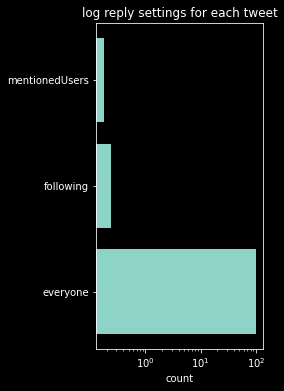

In [730]:
plt.figure(figsize = (3,6))
plt.barh(width=rsvcs, y=rsvcs.index, log = True)
plt.title("log reply settings for each tweet")
plt.xlabel('count');

---
### Language `lang`

A JSON converter for iso language codes to their proper english names was grabbed from [github/haliaeetus iso-639](https://github.com/haliaeetus/iso-639)

In [731]:
with open('../iso_639-1.json', 'r', encoding='utf-8') as lang_file:
    lang_dict = json.load(lang_file)
lang_dict['und'] = {'name':'undefined'}
lang_dict['in'] = {'name':'Indonesian'} #filling in some missing ones
lang_dict['iw'] = {'name':'Hebrew'}

In [732]:
lang_dict['aa']

{'639-1': 'aa',
 '639-2': 'aar',
 'family': 'Afro-Asiatic',
 'name': 'Afar',
 'nativeName': 'Afaraf',
 'wikiUrl': 'https://en.wikipedia.org/wiki/Afar_language'}

In [ ]:
np.logspace(0,5,5)

In [ ]:
#plot languages
lang_vcs = tudf['lang'].value_counts()
lang_vcs_names = [
     lang_dict[lang]['name']
     for lang in lang_vcs.index
]
plt.figure(figsize=(12,24))
plt.grid(axis = 'x')
plt.barh(width=lang_vcs[::-1], y=lang_vcs_names[::-1], log = True)
plt.title('Twitter Wordle languages (log)')
plt.xlabel("number of tweets in data set")
for xpos in np.logspace(0,5,6):
    plt.text(x = xpos*1.1, y = 46, s= str(xpos))

---
### entities_tweet

These were `entities` in the tweets data. Entities are json-like columns with the following keys:

In [ ]:
entities_tweet_keys = ['urls', 'mentions', 'hashtags', 'annotations', 'cashtags']

In [ ]:
tudf['entities_tweet'].head()

In [623]:

tudf = expand_json_cols(tudf, ['entities_tweet'], drop_json_cols=True).head()

KeyError: 'entities_tweet'

# Tweet Rates, time.

In [23]:
tudf['created_at'] = pd.to_datetime(tudf['created_at'])

In [24]:
tudf.sort_values(by = 'created_at', inplace= True)

In [25]:
tudf['wordle_tweet_number'] = range(len(tudf))

In [26]:
tudf['ones'] = np.ones(len(tudf))

In [27]:
time_diff = tudf['created_at'].max() -  tudf['created_at'].min()
time_diff.seconds

21757

In [28]:
tudf['wordle_tweet_rate'] = tudf['ones'][:-1]/list(map(lambda time: time.seconds,np.diff(tudf['created_at'])))

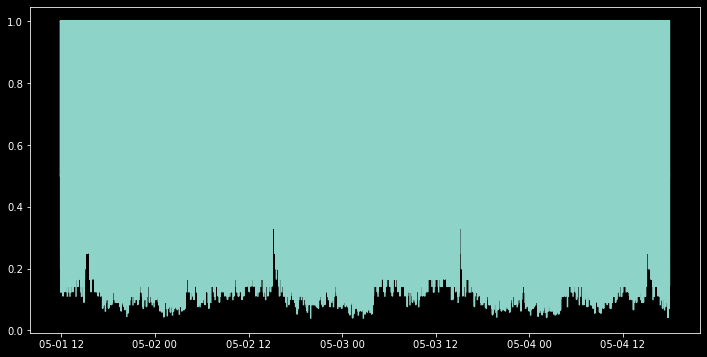

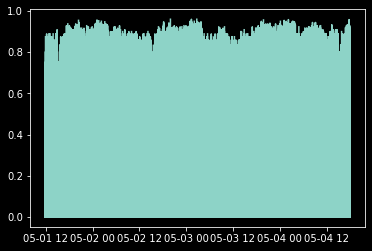

In [29]:
accumulated_tweets = np.linspace(0,len(tudf), len(tudf))
tweet_rate = [
    1/timespan.seconds
    for timespan in np.diff(tudf['created_at'].sort_values(ascending = True))
    if timespan.seconds != 0
]

# plt.figure(figsize = (12,6))
# plt.plot(tudf['created_at'].sort_values(ascending = True)[:-1], tweet_rate)
# # k= 2e7
# # plt.ylim(-k,k)
# plt.show()


plt.figure(figsize = (12,6))
plt.plot(tudf['created_at'], tudf['wordle_tweet_rate'])
plt.show()
plt.plot(tudf['created_at'], tudf['ones'] - tudf['wordle_tweet_rate'])

(0.0, 25.0)

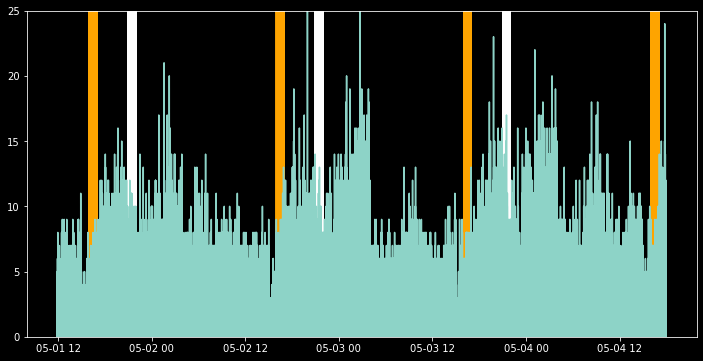

In [30]:
plt.figure(figsize = (12,6))
for fivepeeem in tudf[tudf['created_at'].apply(lambda x: x.hour == 21)]['created_at']:
    plt.axvline(fivepeeem)
for lunchtime in tudf[tudf['created_at'].apply(lambda x: x.hour == 16)]['created_at']:
    plt.axvline(lunchtime, color = 'orange')    
plt.plot(tudf['created_at'][:-1],np.diff(tudf['created_at'].apply(lambda x: x.second)) )
plt.ylim(0,25)

In [31]:
import datetime as dt

In [32]:
tudf['time_since_last_tweet'] = tudf['created_at'].diff().dt.total_seconds()

In [33]:
tudf['time_since_last_tweet']

tweet_id
1520733408237916161    NaN
1520733408607019008    0.0
1520733410947485702    0.0
1520733414999138310    1.0
1520733412725870592    0.0
                      ... 
1521911808176451586    1.0
1521911810563190785    1.0
1521911819077505026    2.0
1521911830817521664    2.0
1521911829244440577    0.0
Name: time_since_last_tweet, Length: 192115, dtype: float64

(0.0, 25.0)

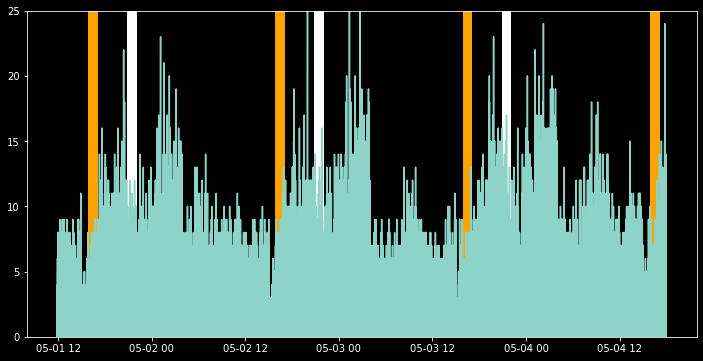

In [34]:
plt.figure(figsize = (12,6))
#make a line at UTC = 9pm, which is 6pm EDT.
for fivepeeem in tudf[tudf['created_at'].apply(lambda x: x.hour == 21)]['created_at']:
    plt.axvline(fivepeeem)
#make a line at UTC = 4pm, which is noon EDT.
for lunchtime in tudf[tudf['created_at'].apply(lambda x: x.hour == 16)]['created_at']:
    plt.axvline(lunchtime, color = 'orange')    
plt.plot(tudf['created_at'],tudf['time_since_last_tweet'] )
plt.ylim(0,25)

In [45]:
tudf['time_since_last_tweet_mean60'] = tudf['time_since_last_tweet'].rolling(60).mean() 

In [52]:
tudf['time_since_last_tweet_mean60'].mean()

1.4623534924891672

Text(0, 0.5, 'average wait time (s)')

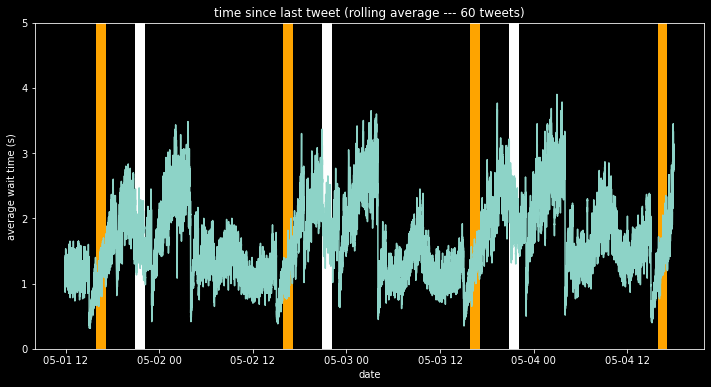

In [53]:
#do the same with rolling averages.
plt.figure(figsize = (12,6))
#make a line at UTC = 9pm, which is 6pm EDT.
for fivepeeem in tudf[tudf['created_at'].apply(lambda x: x.hour == 21)]['created_at']:
    plt.axvline(fivepeeem)
#make a line at UTC = 4pm, which is noon EDT.
for lunchtime in tudf[tudf['created_at'].apply(lambda x: x.hour == 16)]['created_at']:
    plt.axvline(lunchtime, color = 'orange')    
plt.plot(tudf['created_at'],tudf['time_since_last_tweet_mean60'])
plt.ylim(0,5)
plt.title("time since last tweet (rolling average --- 60 tweets)")
plt.xlabel("date")
plt.ylabel("average wait time (s)")

Text(0, 0.5, 'average wait time (s)')

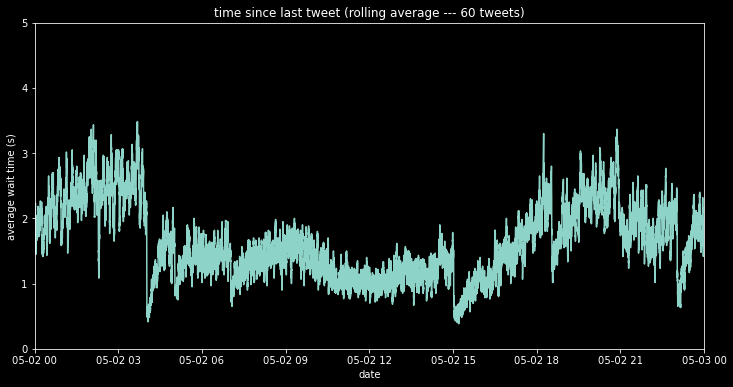

In [57]:
#plot rolling averages in one day.
plt.figure(figsize = (12,6))
plt.xlim(datetime(2022, 5,2,0,0,0, tzinfo = UTC), datetime(2022, 5,3,0,0,0, tzinfo = UTC))
plt.plot(tudf['created_at'],tudf['time_since_last_tweet_mean60'])
plt.ylim(0,5)
plt.title("time since last tweet (rolling average --- 60 tweets)")
plt.xlabel("date")
plt.ylabel("average wait time (s)")

Text(2022-05-02 22:00:00+00:00, 2.0, '     France\n     Germany\n     Spain')

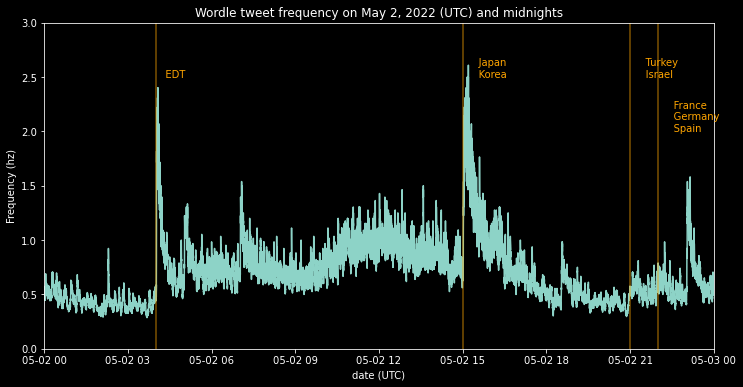

In [109]:
#plot the inverse. This is tweet frequency.

UTC = tz.gettz('UTC')

edt_offset = 4 # 4 am utc == midnight east coast usa. gmt -4
pdt_offset = 6 #6 am == midnight west coast usa. gmt -6
tokyo_offset = 15 # 3pm UTC == midnight japan, korea. gmt +9
turkey_offset = 21  # 9pm UTC == midnight turkey, israel. gmt +3
france_offset = 22 #10 pm UTC = midnight france, germany. gmt +2
canberra_offset = 14 # 2 pm UTC == midnight ACT eastern australia. GMT + 10

#more appropriately, should make tzinfo the corresponding type. but.
def midnight_datetime_may2(offset, tzinfo = UTC):
    midnight = datetime(2022, 5, 2, 0 + offset, 0, 0 ,tzinfo = tzinfo)
    return midnight

edt_midnight = midnight_datetime_may2(edt_offset)
tokyo_midnight =  midnight_datetime_may2(tokyo_offset)
turkey_midnight =  midnight_datetime_may2(turkey_offset)
france_midnight = midnight_datetime_may2(france_offset)


plt.figure(figsize = (12,6))
plt.xlim(datetime(2022, 5,2,0,0,0, tzinfo = UTC), datetime(2022, 5,3,0,0,0, tzinfo = UTC))
plt.plot(tudf['created_at'], tudf['ones']/tudf['time_since_last_tweet_mean60'])
plt.ylim(0,3)
plt.title("Wordle tweet frequency on May 2, 2022 (UTC) and midnights")
plt.xlabel("date (UTC)")
plt.ylabel("Frequency (hz)")

plt.axvline(edt_midnight,  color = colors.to_rgba('orange',0.5))
plt.axvline(tokyo_midnight, color = colors.to_rgba('orange',0.5))
plt.axvline(turkey_midnight,  color = colors.to_rgba('orange',0.5))
plt.axvline(france_midnight,  color = colors.to_rgba('orange',0.5))

plt.text(edt_midnight, 2.5, "   EDT", color = 'orange')
plt.text(tokyo_midnight, 2.5, "     Japan\n     Korea", color = 'orange')
plt.text(turkey_midnight, 2.5, "     Turkey\n     Israel ", color = 'orange')
plt.text(france_midnight, 2., "     France\n     Germany\n     Spain", color = 'orange')

In [ ]:
#This is UTC, leading east coast USA by four hours. Some of these features definitely repeat.

# making the time series regular

The time data is irregular. Follow [this stack overflow](https://stackoverflow.com/questions/25234941/python-regularise-irregular-time-series-with-linear-interpolation) answer to use `traces` to make a regular time series.

> You can do this with traces. First, create a TimeSeries with your irregular measurements like you would a dictionary:
```python
    ts = traces.TimeSeries([
    (datetime(1992, 8, 27, 7, 46, 48), 28.0),
    (datetime(1992, 8, 27, 8, 0, 48), 28.2),
    ...
    (datetime(1992, 8, 27, 9, 3, 48), 30.0),
])
```

Then regularize using the sample method:

```python
    ts.sample(
    sampling_period=timedelta(minutes=15),
    start=datetime(1992, 8, 27, 8),
    end=datetime(1992, 8, 27, 9),
    interpolate='linear',
```
> This results in the following regularized version, where the gray dots are the original data and the orange is the regularized version with linear interpolation.

In [37]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install traces

[traces is pretty cool](https://traces.readthedocs.io/en/latest/#:~:text=The%20main%20object%20in%20traces,%3A45%3A56am%2C%20etc.&text=What%20if%20you%20want%20to,one%20of%20the%20measurement%20times.). It makes TimeSeries objects that interpolate between the data points by default. You can put any datetime in.

In [38]:
tudf['created_at']

tweet_id
1520733408237916161   2022-05-01 11:54:33+00:00
1520733408607019008   2022-05-01 11:54:33+00:00
1520733410947485702   2022-05-01 11:54:33+00:00
1520733414999138310   2022-05-01 11:54:34+00:00
1520733412725870592   2022-05-01 11:54:34+00:00
                                 ...           
1521911808176451586   2022-05-04 17:57:05+00:00
1521911810563190785   2022-05-04 17:57:06+00:00
1521911819077505026   2022-05-04 17:57:08+00:00
1521911830817521664   2022-05-04 17:57:10+00:00
1521911829244440577   2022-05-04 17:57:10+00:00
Name: created_at, Length: 192115, dtype: datetime64[ns, UTC]

In [39]:
import traces

from datetime import datetime

from dateutil import tz

In [40]:
#make a time series
ts = traces.TimeSeries(
        zip( tudf['created_at'],
            tudf['time_since_last_tweet_mean60']
        )
    )

tudf.iloc[0]['created_at']

Timestamp('2022-05-01 11:54:33+0000', tz='UTC')

In [41]:
#Give the time series tz awareness when making values.

UTC = tz.gettz('UTC')
ts[datetime(2042, 2, 1,  6,  0,  0, tzinfo = UTC)]

2.85

In [42]:
#make a histogram of the time series.
histogram = ts.distribution(
start=tudf['created_at'].min(),
end=tudf['created_at'].max()
)
histogram.median()

1.5333333333333334

In [43]:
histogram.standard_deviation(), histogram.mean(), histogram.max(), histogram.min()

(nan, nan, 3.9, nan)


## seasonal decomposing

I may not be able to do this without some conversion between the `traces` timeseries and however statsmodels works

In [44]:
ts[1]

TypeError: '<' not supported between instances of 'int' and 'Timestamp'

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(ts)

plt.rc('figure', figsize(12,6))
decomp.plot();



In [ ]:
tudf['time_since_last_tweet']

In [ ]:
tudf['created_at'].apply(lambda x: x.second)

# geo and location

`geo` is a geocode corresponding to a location. They are also called `place_id`. The great majority of tweets do not have a geo code, but perhaps location could be gathered by the user, rather than the tweet itself.

According to [Get information about a place](https://developer.twitter.com/en/docs/twitter-api/v1/geo/place-information/api-reference/get-geo-id-place_id) in the Twitter docs,
> These IDs can be retrieved from geo/reverse_geocode.

`location` is a very general string.

In [ ]:

tudf.columns

In [ ]:
tudf['geo'].value_counts()

In [ ]:
len(tudf)

In [ ]:
#she/her is a location according to 239 of these

In [ ]:
tudf['location'].value_counts().head(30)

In [ ]:
tudf['entities_user'].iloc[2]

# User `entities`

I've called them `entities_user` in the merged df.

In [ ]:
json_list

In [ ]:
#the .replace("'", '"')
# must be done to replace single quotes with double quotes. otherwise it's not JSON.
json.loads(tudf['entities_user'].iloc[1].replace("'", '"'))

In [ ]:
json.loads()

In [ ]:
str.replace

### verified

In [234]:
tudf[tudf['verified'] == True]

,conversation_id,reply_settings,lang,entities_tweet,possibly_sensitive,source,public_metrics_tweet,text,context_annotations,author_id,...,url,description,profile_image_url,location,protected,username,verified,entities_user,pinned_tweet_id,withheld_user
tweet_id,,,,,,,,,,,,,,,,,,,,,
1521732483011678208,1521732483011678208,everyone,en,0,False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 319 4/6\n\n⬜⬜🟩🟨🟩\n⬜🟩🟩⬜🟩\n⬜🟩🟩🟩🟩\n🟩🟩🟩🟩🟩,"[{'domain': {'id': '30', 'name': 'Entities [En...",21319630,...,https://t.co/ruI5hDjoCJ,Culture editor for https://t.co/BxsqjLzAG9. Ol...,https://pbs.twimg.com/profile_images/137802458...,"Salt Lake City, Utah",False,SeanPMeans,True,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",0.000000e+00,0
1521728105353678851,1521728105353678851,everyone,en,0,False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 319 4/6\n\n⬜⬜🟨⬜⬜\n⬜🟨⬜⬜🟩\n⬜🟨🟩🟩🟩\n🟩🟩🟩🟩🟩🏋️‍♀️,"[{'domain': {'id': '30', 'name': 'Entities [En...",20658431,...,https://t.co/u0IQ155nFc,Televisionary,https://pbs.twimg.com/profile_images/152146574...,Australia,False,Jabbatron,True,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",1.133909e+18,0
1521727958372737025,1510855326161117185,everyone,en,"{'mentions': [{'start': 0, 'end': 16, 'usernam...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",@IreneSGuadalupo @NisMorFer Wordle 319 4/6\n⬜🟨...,"[{'domain': {'id': '30', 'name': 'Entities [En...",18690355,...,https://t.co/Zz9rgVMkU0,Desearía que más personas se preocuparan del m...,https://pbs.twimg.com/profile_images/143172254...,Segovia,False,Milhaud,True,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",9.941547e+17,0
1521726666585874434,1521726666585874434,everyone,en,"{'urls': [{'start': 42, 'end': 65, 'url': 'htt...",False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle (ES) #118 3/6\n\n⬜⬜⬜⬜🟩\n⬜⬜🟨⬜🟩\n🟩🟩🟩🟩🟩\n...,"[{'domain': {'id': '30', 'name': 'Entities [En...",189823957,...,0,Me encanta viajar por carreteras secundarias. ...,https://pbs.twimg.com/profile_images/146798198...,Murcia,False,garciaretegui,True,0,0.000000e+00,0
1521724243062366213,1521724243062366213,everyone,en,0,False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 319 4/6\n\n🟩⬛⬛⬛⬛\n🟨⬛⬛⬛⬛\n⬛🟩🟨🟨⬛\n🟩🟩🟩🟩🟩,"[{'domain': {'id': '30', 'name': 'Entities [En...",19869814,...,https://t.co/9T1aAAFXt8,Sports journalist @the_hindu . FIA accredited ...,https://pbs.twimg.com/profile_images/142319722...,Chennai,False,dipakragav,True,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",0.000000e+00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520735198828109824,1520735198828109824,everyone,en,0,False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 14, 'like_...",Wordle 316 5/6\r\n\r\n⬜🟨⬜⬜⬜\r\n⬜⬜⬜⬜⬜\r\n⬜⬜🟩⬜⬜\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",23103351,...,https://t.co/xjEa5MGsYT,@EbonyMag #Power100 @Essence #Woke100. Prof. P...,https://pbs.twimg.com/profile_images/126838338...,Global,False,karenhunter,True,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",1.147608e+18,0
1520734510379323392,1520734510379323392,everyone,tr,"{'urls': [{'start': 48, 'end': 71, 'url': 'htt...",False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 3, 'like_c...",Wordle Türkçe 316 4/6\r\n\r\n⬜⬜⬜⬜⬜\r\n🟩⬜⬜⬜⬜\r\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",341071545,...,https://t.co/OByiy1t7Rj,"@kafadergisi yazarı, Oyuncu. iletişim: @gavsar...",https://pbs.twimg.com/profile_images/138310839...,İstanbul,False,celilnalcakan,True,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",1.512321e+18,0
1520733907217432578,1492893611825971204,everyone,en,0,False,Twitter Web App,"{'retweet_count': 0, 'reply_count': 2, 'like_c...",Too many close calls here...\r\n\r\nWordle 316...,"[{'domain': {'id': '30', 'name': 'Entities [En...",32284383,...,https://t.co/04uDTeI5Ld,"Meteorologist with @CityNewsTO, @WGR